In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [9]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.1.2-cp38-cp38-macosx_12_0_arm64.whl (7.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 6.8 MB/s eta 0:00:0000:0100:01m


In [11]:
df = pd.read_csv("AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [12]:
len(df)

1258

In [13]:
df_close = df.reset_index()["close"]
type(df_close)

pandas.core.series.Series

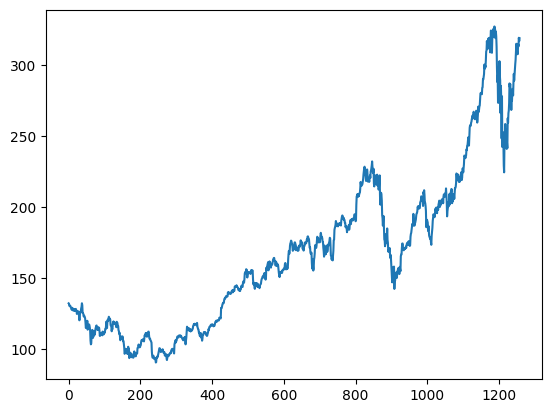

In [14]:
plt.plot(df_close)
plt.show()

In [24]:
#Min MAx Scaler
m_scaler = MinMaxScaler(feature_range=(0,1))
df_close_scaled = m_scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close_scaled.shape

(1258, 1)

In [25]:
#Doing Train Test Split
train_prcn = 0.7
train_len = int(df_close_scaled.shape[0] * train_prcn)
test_len = df_close_scaled.shape[0] - train_len
train_arr, test_arr = df_close_scaled[:train_len, :], df_close_scaled[train_len:, :]
#train_arr, test_arr

In [26]:
#Generate Data which will go inside the Model
time_stamps = 100

def generate_data(arr, time_stamps):
    total_len = arr.shape[0] - time_stamps
    
    X_train, y_train = [], []
    for i in range(total_len):
        X_train.append(arr[i:i+time_stamps, 0])
        y_train.append(arr[i+time_stamps, 0])
        
    return np.array(X_train), np.array(y_train)
        
X_train, y_train = generate_data(train_arr, 100)
X_test, y_test = generate_data(test_arr, 100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((780, 100), (780,), (278, 100), (278,))

In [27]:
#Reshaping the Input Array for LSTM Model

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((780, 100, 1), (278, 100, 1))

In [28]:
# Build a LSTM Model to Predict Forecasting Values
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam') 

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 3s 149ms/step - loss: 0.0212 - val_loss: 0.0791
Epoch 2/100
13/13 [==============================] - 1s 103ms/step - loss: 0.0048 - val_loss: 0.0067
Epoch 3/100
13/13 [==============================] - 1s 105ms/step - loss: 0.0013 - val_loss: 0.0068
Epoch 4/100
13/13 [==============================] - 1s 116ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 5/100
13/13 [==============================] - 1s 114ms/step - loss: 8.2429e-04 - val_loss: 0.0054
Epoch 6/100
13/13 [==============================] - 1s 106ms/step - loss: 7.6949e-04 - val_loss: 0.0061
Epoch 7/100
13/13 [==============================] - 1s 104ms/step - loss: 7.5645e-04 - val_loss: 0.0051
Epoch 8/100
13/13 [==============================] - 2s 117ms/step - loss: 7.5284e-04 - val_loss: 0.0050
Epoch 9/100
13/13 [==============================] - 2s 118ms/step - loss: 7.2522e-04 - val_loss: 0.0053
Epoch 10/100
13/13 [==============================] - 2s 120ms/step - l

In [32]:
tf.__version__

'2.10.0'

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict.shape, test_predict.shape


9/9 [==============================] - 0s 12ms/step


((780, 1), (278, 1))

In [34]:
train_predict = m_scaler.inverse_transform(train_predict)
test_predict = m_scaler.inverse_transform(test_predict)
train_predict.shape, test_predict.shape

((780, 1), (278, 1))

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

152.39467521892132

In [36]:
math.sqrt(mean_squared_error(y_test, test_predict))

253.247198976192

1258


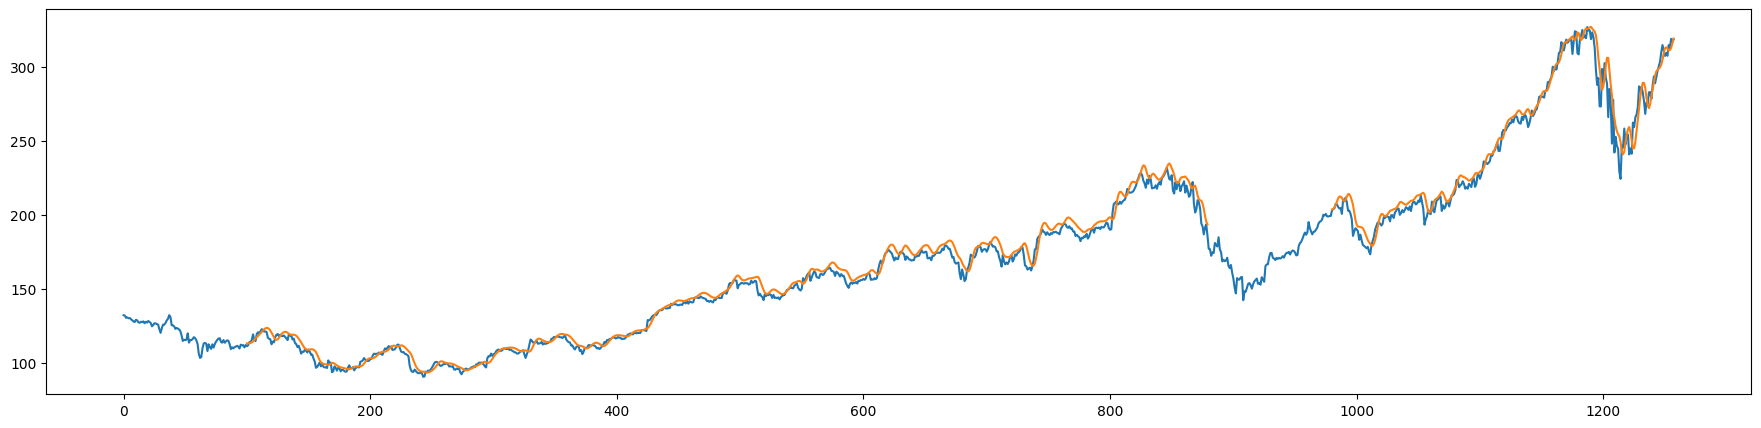

In [157]:
predict_plot = np.empty_like(df_close_scaled)
predict_plot[:,:] = np.nan
predict_plot[time_stamps : time_stamps + len(train_predict), :] = train_predict

#test_predict_plot = np.empty_like(test_arr)
#test_predict_plot[:,:] = np.nan
predict_plot[len(train_arr) + time_stamps:,:] = test_predict
print(len(predict_plot))

plt.figure(figsize=(22,5))
plt.plot(m_scaler.inverse_transform(df_close_scaled))
plt.plot(predict_plot)


In [152]:
len(predict_plot)

1258

In [158]:
#Predict the Future or Forecast for Future
n_days = 100
i = 0
future_predict_scaled = []
future_predict = []
while(i<n_days):
    
    if i == 0:
        test_i = test_arr[len(test_arr) - time_stamps: len(test_arr)]
        
        test_i_final = test_i.reshape(1, 100)
        test_i_final = test_i_final.reshape(1, 100, 1)
        future_predict_scaled.append(model.predict(test_i_final))
        future_predict.append(m_scaler.inverse_transform(future_predict_scaled[-1]))
        #print(future_predict)
        print("\n")
        
    else:
        
        test_i = np.array(list(test_i[1:]) + list(future_predict_scaled[-1]))
        #print(list(future_predict[-1]))
        #print(list(test_i[1:]))
        #print(test_i)
        test_i_final = test_i.reshape(1, 100)
        test_i_final = test_i_final.reshape(1, 100, 1)
        future_predict_scaled.append(model.predict(test_i_final))
        future_predict.append(m_scaler.inverse_transform(future_predict_scaled[-1]))
        #print(future_predict)
        print("\n")
    i = i+1

len(future_predict_scaled)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [=======================

100

In [159]:


print(len(predict_plot), len(future_predict))
predict_plot = list(predict_plot) + future_predict
len(predict_plot)

1258 100


1358

/Users/djkhai/miniforge3/envs/tensorflow/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


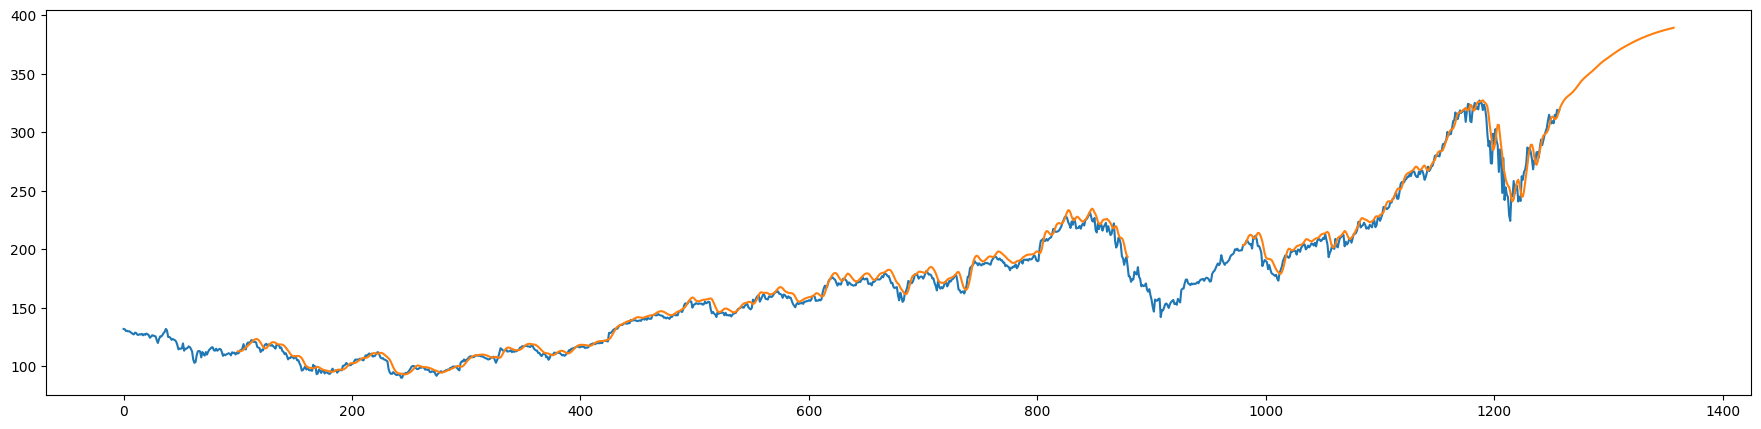

In [160]:
plt.figure(figsize=(22,5))
plt.plot(m_scaler.inverse_transform(df_close_scaled))
plt.plot(predict_plot)